In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
paths = ['/content/drive/My Drive/train.csv', '/content/drive/My Drive/test.csv']

In [6]:
train_data = pd.read_csv(paths[0])

In [7]:
train_data.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [8]:
test_data = pd.read_csv(paths[1])

In [9]:
test_data.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [11]:
train_data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [12]:
train_data.isnull().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167
...,...
mosque_count_5000,0
leisure_count_5000,0
sport_count_5000,0
market_count_5000,0


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: float64(116), int64(159), object(16)
memory usage: 17.0+ MB


In [14]:
test_data.isnull().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,1176
floor,0
...,...
church_count_5000,0
mosque_count_5000,0
leisure_count_5000,0
sport_count_5000,0


In [15]:
#Date Handling
# Convert date column to datetime
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], format='%Y-%m-%d')
train_data['Year'] = train_data['timestamp'].dt.year
train_data['Month'] = train_data['timestamp'].dt.month
train_data['Day'] = train_data['timestamp'].dt.day

In [16]:
#Date Handling
# Convert date column to datetime
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], format='%Y-%m-%d')
test_data['Year'] = test_data['timestamp'].dt.year
test_data['Month'] = test_data['timestamp'].dt.month
test_data['Day'] = test_data['timestamp'].dt.day

In [17]:
object_cols = train_data.select_dtypes(include='object').columns
print("Object Columns:", object_cols)

Object Columns: Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


In [18]:
object_cols = test_data.select_dtypes(include='object').columns
print("Object Columns:", object_cols)

Object Columns: Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in object_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in object_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

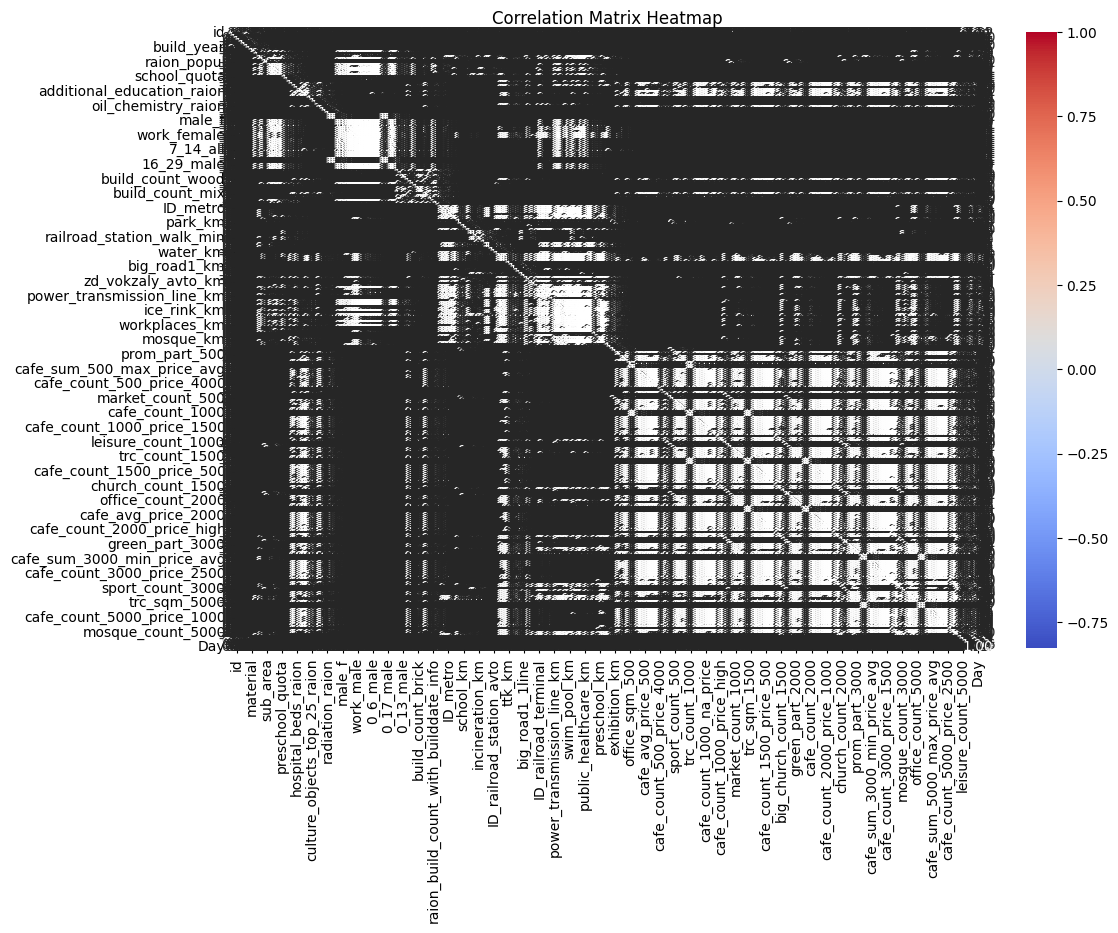

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

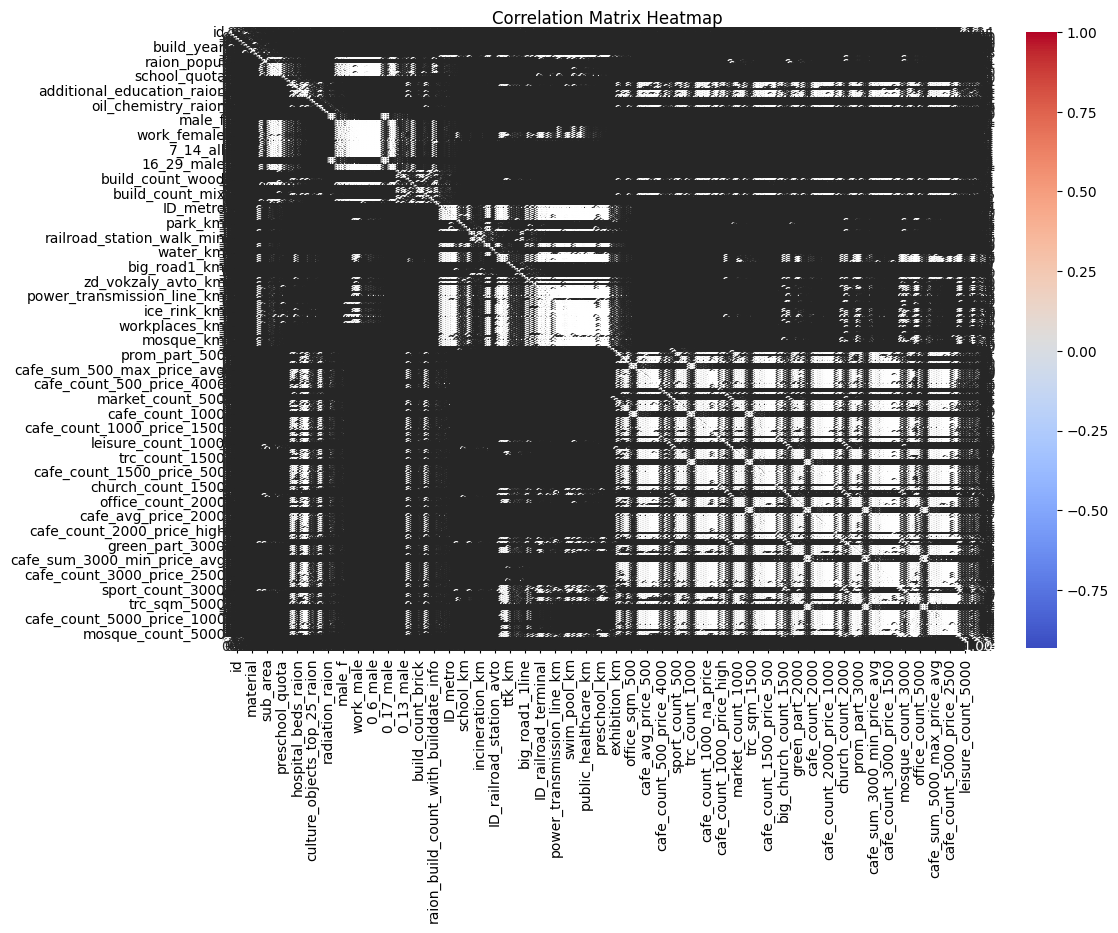

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = test_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
# Handling missing values for numerical columns and imputing with mean
from sklearn.impute import SimpleImputer
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_cols] = numerical_imputer.fit_transform(train_data[numerical_cols])

In [22]:
train_data.isnull().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,0
floor,0
...,...
market_count_5000,0
price_doc,0
Year,0
Month,0


In [23]:
# Handling missing values for numerical columns and imputing with mean for test data
from sklearn.impute import SimpleImputer
numerical_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
test_data[numerical_cols] = numerical_imputer.fit_transform(test_data[numerical_cols])

In [24]:
test_data.isnull().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,0
floor,0
...,...
sport_count_5000,0
market_count_5000,0
Year,0
Month,0


In [25]:
X = train_data.drop('price_doc' , axis=1)
y = train_data['price_doc']

In [26]:
X.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,Year,Month,Day
0,1.0,2011-08-20,43.0,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,0.0,13.0,22.0,1.0,0.0,52.0,4.0,2011,8,20
1,2.0,2011-08-23,34.0,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,0.0,15.0,29.0,1.0,10.0,66.0,14.0,2011,8,23
2,3.0,2011-08-27,43.0,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,0.0,11.0,27.0,0.0,4.0,67.0,10.0,2011,8,27
3,4.0,2011-09-01,89.0,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,1.0,4.0,4.0,0.0,0.0,26.0,3.0,2011,9,1
4,5.0,2011-09-05,77.0,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,17.0,135.0,236.0,2.0,91.0,195.0,14.0,2011,9,5


In [27]:
y.head(5)

,price_doc
0,5850000.0
1,6000000.0
2,5700000.0
3,13100000.0
4,16331452.0


In [28]:
X = X.drop(columns=['timestamp'], errors='ignore')
test_data = test_data.drop(columns=['teststamp'], errors='ignore')

In [29]:
X.head(5)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,Year,Month,Day
0,1.0,43.0,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0.0,13.0,22.0,1.0,0.0,52.0,4.0,2011,8,20
1,2.0,34.0,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0.0,15.0,29.0,1.0,10.0,66.0,14.0,2011,8,23
2,3.0,43.0,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0.0,11.0,27.0,0.0,4.0,67.0,10.0,2011,8,27
3,4.0,89.0,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1.0,4.0,4.0,0.0,0.0,26.0,3.0,2011,9,1
4,5.0,77.0,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,17.0,135.0,236.0,2.0,91.0,195.0,14.0,2011,9,5


In [30]:
train_features = set(X.columns)
test_features = set(test_data.columns)

In [31]:
extra_test_features = test_features - train_features
print(extra_test_features)

{'timestamp'}


In [32]:
if extra_test_features:
    print(f"Dropping extra features from test data: {extra_test_features}")
    test_data = test_data.drop(columns=list(extra_test_features))

Dropping extra features from test data: {'timestamp'}


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_data)

In [34]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=100, random_state=42),
    "SVR": SVR(C=1, kernel="rbf"),
    "Gradient Boosting": GradientBoostingRegressor(alpha=0.0001, random_state=42)
}

In [35]:
model_performance = {}
for name, model in models.items():
    model.fit(X_train_scaled, y)
    y_pred = model.predict(X_test_scaled)
    y_test = np.zeros_like(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    model_performance[name] = mse
    print(f"{name} MSE: {mse}")

RandomForest MSE: 71116924530108.05
DecisionTree MSE: 77922378906010.36


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP MSE: 2213436443158.665
SVR MSE: 39381428955387.37
Gradient Boosting MSE: 74291286530887.5


In [39]:
from sklearn.ensemble import StackingRegressor
print("Training Stacking Regressor...")
subset_X, subset_y = X_train_scaled[:100], y[:100]
estimators = [(name, model) for name, model in models.items()]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking_model.fit(subset_X, subset_y)


Training Stacking Regressor...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

StackingRegressor(estimators=[('RandomForest',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('DecisionTree',
                               DecisionTreeRegressor(max_depth=10,
                                                     random_state=42)),
                              ('MLP',
                               MLPRegressor(max_iter=100, random_state=42)),
                              ('SVR', SVR(C=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(alpha=0.0001,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor())

In [40]:
# Evaluate Stacking Model
results = {}
y_pred_stacking = stacking_model.predict(X_test_scaled)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
results["Stacking"] = {'MSE': mse_stacking, 'R²': r2_stacking}
print(f"Stacking Model - MSE: {mse_stacking}, R²: {r2_stacking}")

Stacking Model - MSE: 51794896990144.484, R²: 0.0


In [42]:
test_predictions = {
    "RandomForest": models["RandomForest"].predict(X_test_scaled),
    "DecisionTree": models["DecisionTree"].predict(X_test_scaled),
    "SVR": models["SVR"].predict(X_test_scaled),
    "Gradient Boosting": models["Gradient Boosting"].predict(X_test_scaled),
    "MLP": models["MLP"].predict(X_test_scaled),
    "Stacked": stacking_model.predict(X_test_scaled)
}

for name, preds in test_predictions.items():
    submission = pd.DataFrame({"Id": range(len(preds)), "price_doc": preds})
    submission.to_csv(f"{name}_submission.csv", index=False)

In [43]:
from google.colab import files
prediction_files = ["RandomForest_submission.csv", "DecisionTree_submission.csv", "SVR_submission.csv", "Gradient Boosting_submission.csv", "MLP_submission.csv", "Stacked_submission.csv"]
for file in prediction_files:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Use a stratified subset of the data for feature selection
subset_X, subset_y = X_train_scaled[:1000], y[:1000]  # Adjust the sample size as needed

# SelectFromModel using RandomForestRegressor
rf_selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")
rf_selector.fit(subset_X, subset_y)

# Get selected features
selected_features_rf = rf_selector.get_support(indices=True)
X_train_rf = X_train_scaled[:, selected_features_rf]
X_test_rf = X_test_scaled[:, selected_features_rf]

print(f"SelectFromModel selected {len(selected_features_rf)} features.")


SelectFromModel selected 147 features.


In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# SequentialFeatureSelector using Linear Regression
sfs = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10, direction="forward", cv=3)
sfs.fit(subset_X, subset_y)

# Get selected features
selected_features_sfs = sfs.get_support(indices=True)
X_train_sfs = X_train_scaled[:, selected_features_sfs]
X_test_sfs = X_test_scaled[:, selected_features_sfs]

print(f"SequentialFeatureSelector selected {len(selected_features_sfs)} features.")


SequentialFeatureSelector selected 10 features.


In [36]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [38]:
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your features and target
# X_train_subset, _, y_train_subset, _ = train_test_split(X, y, test_size=0.8, random_state=42, stratify=pd.qcut(y, q=4))

def genetic_feature_selection(X, y, model, n_features, n_population=50, n_generations=10):
    n_features_total = X.shape[1]

    # Ensure X is a numpy array for proper indexing
    X = np.array(X)

    # Define the problem
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features_total)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def evaluate(individual):
        selected_features = [i for i in range(len(individual)) if individual[i] == 1]
        if len(selected_features) < n_features:
            return -1000,  # Penalize if fewer features are selected
        X_selected = X[:, selected_features]
        scores = cross_val_score(model, X_selected, y, cv=3, scoring="neg_mean_squared_error")
        return np.mean(scores),

    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Run the algorithm
    population = toolbox.population(n=n_population)
    hof = tools.HallOfFame(1)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_generations, halloffame=hof, verbose=True)

    # Extract the best individual
    best_individual = hof[0]
    selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
    return selected_features

# Example usage
X_train_subset = np.random.rand(100, 10)  # Example data (100 samples, 10 features)
y_train_subset = np.random.rand(100)  # Example target values
model = RandomForestRegressor(n_estimators=100)
n_features = 5

# Get selected features using Genetic Selection
selected_features = genetic_feature_selection(X_train_subset, y_train_subset, model, n_features)
print("Selected features:", selected_features)


gen	nevals
0  	50    
1  	28    
2  	34    
3  	32    
4  	29    
5  	28    
6  	25    
7  	32    
8  	21    
9  	31    
10 	33    
Selected features: [0, 2, 5, 7, 8]


In [39]:

# Compare Results with Regression
# Rebuild models using selected features and evaluate
models = {'SelectFromModel': selected_features_rf,
          'SequentialFeatureSelector': selected_features_sfs,
          'GeneticSelectionCV': selected_features}
trained_models = {}
for name, features in models.items():
    features = [f for f in features if f < X_train_subset.shape[1]]
    X_train_selected = X_train_scaled[:, features]
    reg_model = LinearRegression()
    reg_model.fit(X_train_selected, y)
    X_train_subset_selected = X_train_subset[:, features]
    y_pred = reg_model.predict(X_train_subset_selected)
    rmse = np.sqrt(mean_squared_error(y_train_subset, y_pred))
    r2 = r2_score(y_train_subset, y_pred)
    print(f"{name} - RMSE: {rmse}, R^2: {r2}")
    trained_models[name] = reg_model

SelectFromModel - RMSE: 8586527.852522863, R^2: -934032472885082.8
SequentialFeatureSelector - RMSE: 7956966.5628925925, R^2: -802087734965336.1
GeneticSelectionCV - RMSE: 8677791.754781727, R^2: -953993151907349.8


In [43]:
from google.colab import files
test_predictions = {}
for name, model in trained_models.items():
    # Select the correct features for prediction
    features = models[name]
    # Ensure features are within the bounds of X_test_scaled
    features = [f for f in features if f < X_test_scaled.shape[1]]
    X_test_selected = X_test_scaled[:, features[:model.coef_.shape[0]]]
    # Make predictions using the selected features
    preds = model.predict(X_test_selected)
    test_predictions[name] = preds

for name, preds in test_predictions.items():
    submission = pd.DataFrame({"Id": range(len(preds)), "price_doc": preds})
    file_name = f"{name}_submission.csv"
    submission.to_csv(f"{name}_submission.csv", index=False)
    files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>